# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit.

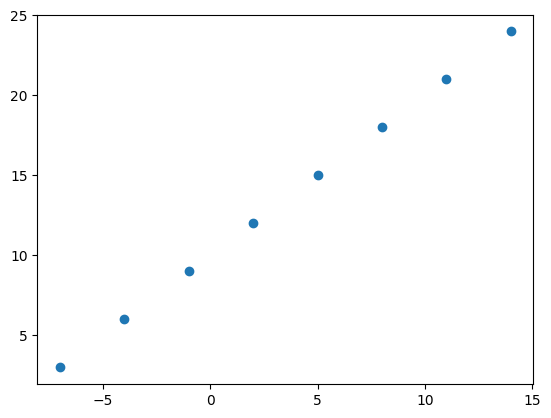

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X, y)

In [3]:
# The function we want the network to learn.
y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

Metal device set to: Apple M1 Max


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
# Turn our NumPY arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

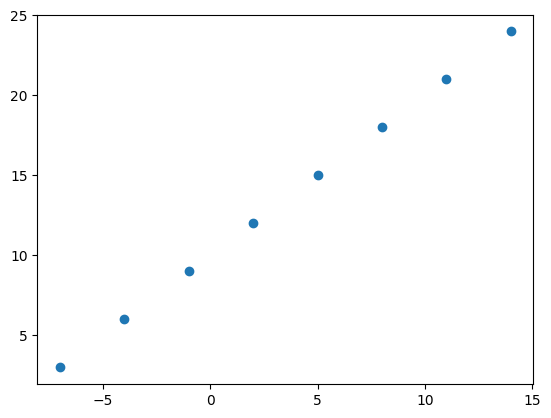

In [7]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrices (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patters between X & Y (features and labels).

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # Stochastic gradient descent.
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, -1), y, epochs=5)


Epoch 1/5


2023-08-31 13:28:46.151711: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 1s/step - loss: 16.6267 - mae: 16.6267
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 16.3454 - mae: 16.3454
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 16.0642 - mae: 16.0642
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 15.7829 - mae: 15.7829
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 15.5017 - mae: 15.5017


In [9]:
# Check out X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 67ms/step


array([[-8.053012]], dtype=float32)

### improving model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of said optimizaion function. 
3. **Fitting a model** - here we might fit a model more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Let's rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train longer)
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 163ms/step - loss: 11.9062 - mae: 11.9062
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.7737 - mae: 11.7737
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.6412 - mae: 11.6412
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.5087 - mae: 11.5087
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3762 - mae: 11.3762
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2437 - mae: 11.2437
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1112 - mae: 11.1112
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9787 - mae: 10.9787
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8462 - mae: 10.8462
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7137 - mae: 10.7137
Epoch 11/100
1/1 [==============================] - 0s 7

In [12]:
# Remind ourselfves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 31ms/step


array([[30.001423]], dtype=float32)

In [14]:
# Let's see if we can improve more

#1. Create the model this time with an additional layer.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train longer)
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 917ms/step - loss: 13.6017 - mae: 13.6017
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.1099 - mae: 13.1099
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6208 - mae: 12.6208
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.1386 - mae: 12.1386
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 11.6554 - mae: 11.6554
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1748 - mae: 11.1748
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6836 - mae: 10.6836
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1720 - mae: 10.1720
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 9.6486 - mae: 9.6486
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0978 - mae: 9.0978
Epoch 11/100
1/1 [==============================] - 0s 8ms/st

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 148ms/step


array([[32.055614]], dtype=float32)

In [16]:
# Remind ourselfves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Let's see if our model's prediction has improved
model.predict([-4.0])

1/1 [==============================] - 0s 16ms/step


array([[2.0068521]], dtype=float32)

In [18]:
 # Let's see if we can improve more
#1. Create the model this time with an additional layer.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
# 3. Fit the model (this time we'll train longer)
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 679ms/step - loss: 11.3272 - mae: 11.3272
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2584 - mae: 11.2584
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1896 - mae: 11.1896
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1206 - mae: 11.1206
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0516 - mae: 11.0516
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9824 - mae: 10.9824
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9130 - mae: 10.9130
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8436 - mae: 10.8436
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7739 - mae: 10.7739
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7041 - mae: 10.7041
Epoch 11/100
1/1 [==============================] - 0s 8m

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 46ms/step


array([[31.447367]], dtype=float32)

### Evaluate the model

When it comes to evaluation... there are 3 words you should memorize:

"Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)

In [20]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X



<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# MAke labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

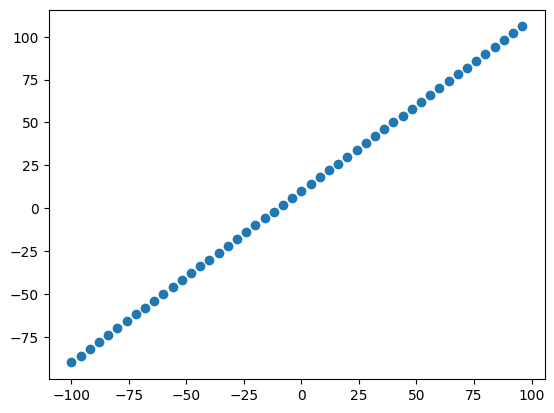

In [22]:
# Visualize the data
import matplotlib.pyplot

plt.scatter(X, y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned from this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what is has learned, thsi set is typically 10-15% of the total data available.


In [23]:
# Check the length of how many samples we have
len(X)

50

In [24]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80%)
y_train = y[:40] 

X_test = X[40:] # last 10 are testing samples (20%)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualising the data

Now we've got our data in training and test sets... let's visualize it again!

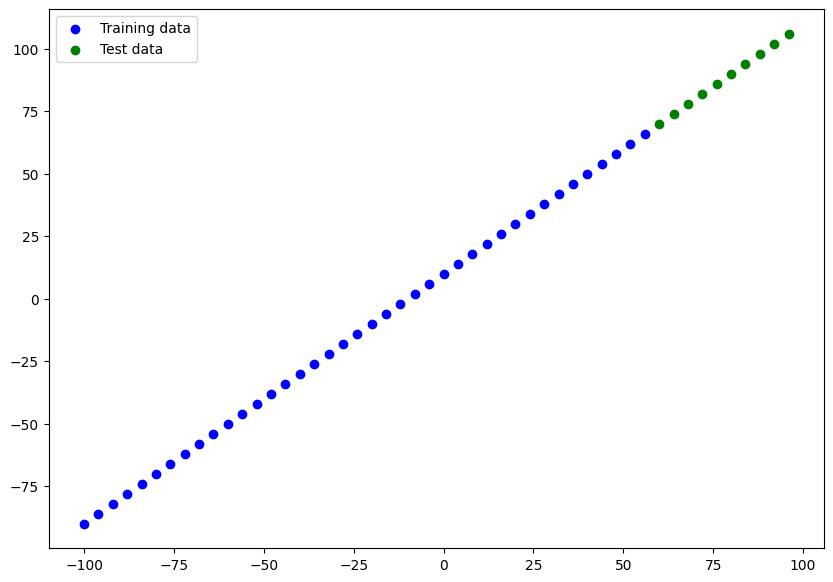

In [25]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend();


In [30]:
#Let's have a look at how to build a neural network for this data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. Fit the model
model.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 26ms/step - loss: 10.2821 - mae: 10.2821
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1455 - mae: 9.1455
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 7.9873 - mae: 7.9873
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.9931 - mae: 7.9931
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 10.1554 - mae: 10.1554
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4184 - mae: 9.4184
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5594 - mae: 8.5594
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0360 - mae: 9.0360
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7382 - mae: 18.7382
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1014 - mae: 10.1014
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - los

In [31]:
## Visualizing the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Let's create a model which build automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model (input / output)
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.

In [34]:
# Let's fit our model to our training data.
model.fit(tf.expand_dims(X_train, -1), y_train, epochs=100, verbose=0)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of 'y_test' or 'y_true' versus 'y_pred' (ground truth versus your model's predictions)

In [36]:
# Make some predictions
y_pred = model.predict(tf.expand_dims(X_test, -1))
y_pred

1/1 [==============================] - 0s 107ms/step


array([[ 69.55497 ],
       [ 74.07955 ],
       [ 78.604126],
       [ 83.12871 ],
       [ 87.65328 ],
       [ 92.177864],
       [ 96.70243 ],
       [101.227   ],
       [105.75159 ],
       [110.27616 ]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [38]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plot model's perdictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

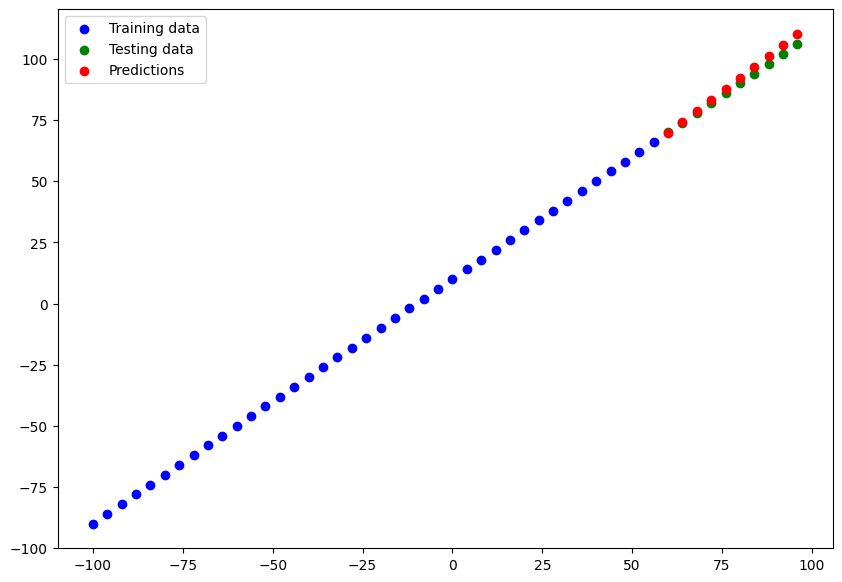

In [41]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics.

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [42]:
# Evaluagte the model on the test 
model.evaluate(tf.expand_dims(X_test, -1), y_test)

1/1 [==============================] - 0s 135ms/step - loss: 2.0046 - mae: 2.0046


[2.0045738220214844, 2.0045738220214844]

In [43]:
# Calculate the mean absolute error:

mae = tf.keras.losses.MAE(
    y_true=y_test, 
    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.0045738>

In [44]:
# Calculate the mean square error:

mae = tf.keras.losses.MSE(
    y_true=y_test, 
    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=5.939637>

In [45]:
# Make some functions to re-use MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> ...

1. Get more data - get more example for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden neurons in each layer.
3. Train for longer - give your model more of a change to find patterns in the data.

Let's do 3 modelling experiments:

1. Model_1 - same as the original model, 1 layer, trained for 100 epochs.
2. Model_2 - 2 layers, trained for 100 epochs.
3. Model_3 - 2 layers, trained for 500 epochs.
4. Model_4...
5. Model_5...

**Build model_1**

In [46]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [47]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 28ms/step


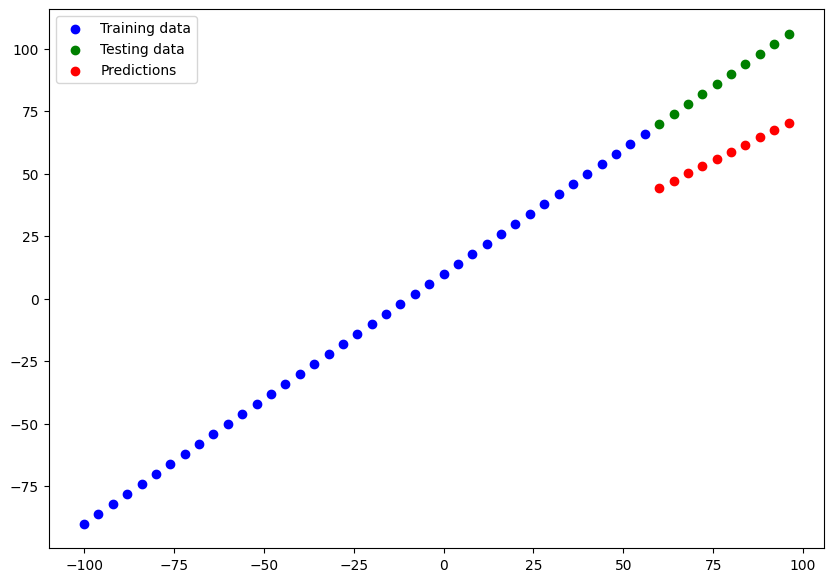

In [48]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [49]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.659632>,
 <tf.Tensor: shape=(), dtype=float32, numpy=950.45917>)

**Build model_2**

2. Dense layers, trained for 100 epochs

In [50]:
# Set random seed
tf.random.set_seed(42)

# Build model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1),
])

# Compile model_2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mse")

# Fit model_2
model_2.fit(X_train, y_train, epochs=100, verbose=0)


1/1 [==============================] - 0s 34ms/step


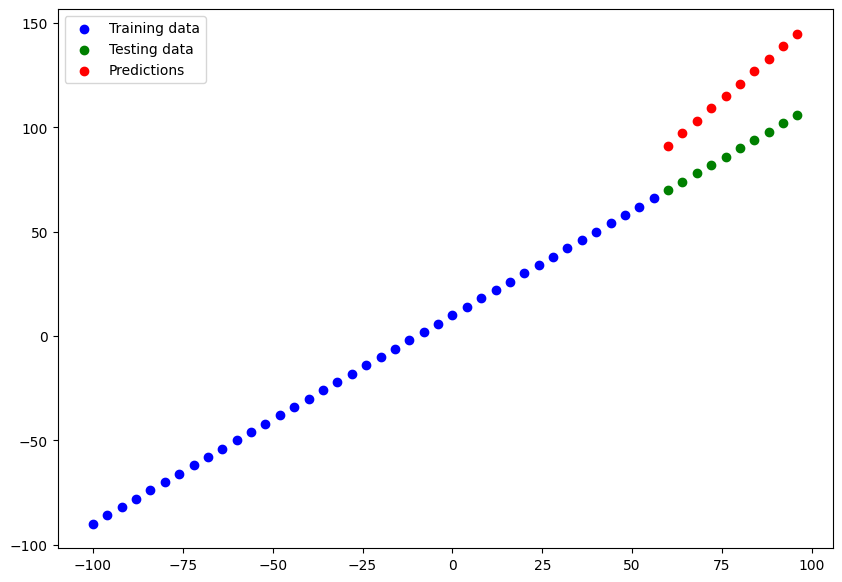

In [51]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [52]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=30.09027>,
 <tf.Tensor: shape=(), dtype=float32, numpy=937.1006>)

**Build model_3**

* 2 layers, trained for 500 epochs

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Build model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile model_3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mse")

# 3. Fit model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 30ms/step


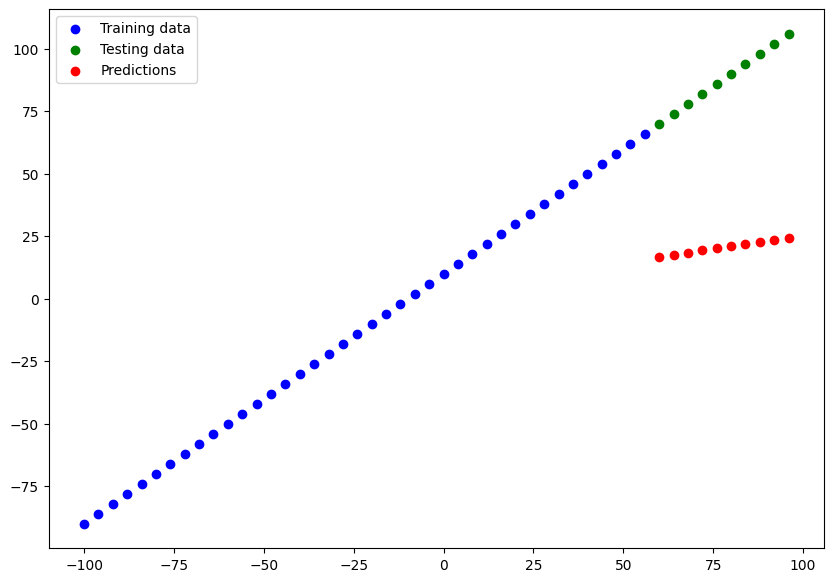

In [54]:
# Make and plot predictions of model_2
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [55]:
mae_3 = mae(y_true=y_test, y_pred=y_preds_3)
mse_3 = mse(y_true=y_test, y_pred=y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.45522>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4633.7764>)

### Comparing the results of our experiments.

We've run a few experiments, let's compare the results

In [56]:
# Let's compare our model's results using a pandas DataFrame.
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.659632,950.459167
1,model_2,30.090269,937.100586
2,model_3,67.455223,4633.776367


Looks like model_1 performed the best.

In [57]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doin so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

Resources:

As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs directly into TensorBoard)

###Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

In [58]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [59]:
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [60]:
# Load in a the SavedModel format model.
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compare model_2 predictions with SaveModel model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 30ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [62]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 30ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [64]:
#from google.colab import files
#files.download("best_model_HDF5_format.h5")

In [65]:
# Save a file from Google Colab to Google Drive
#!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/...

###A larger example

In [66]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [84]:
# Let's try one-hot encode our DataFrame so it's all numbers.
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [86]:
# Create X & y values (features and sets)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float32
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float32
 3   sex_female        1338 non-null   bool   
 4   sex_male          1338 non-null   bool   
 5   smoker_no         1338 non-null   bool   
 6   smoker_yes        1338 non-null   bool   
 7   region_northeast  1338 non-null   bool   
 8   region_northwest  1338 non-null   bool   
 9   region_southeast  1338 non-null   bool   
 10  region_southwest  1338 non-null   bool   
dtypes: bool(8), float32(2), float64(1)
memory usage: 31.5 KB


In [107]:
import so_ml_tools as soml

# int64 -> float32
soml.pandas.dataframe.convert_column_to_type(dataframe=X, columns=['age', 'children'], dtype=np.float32)

# bool -> float32
soml.pandas.dataframe.convert_column_to_type(dataframe=X, columns=['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], dtype=np.float32)

TypeError: convert_column_to_type() got an unexpected keyword argument 'columns'

In [108]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [109]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [110]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [111]:
tf.random.set_seed(42)

# Build a neural network (sort of like model_2 above)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[11], activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01 ),
              metrics=["mae"])

insurance_model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
34/34 [==============================] - 1s 9ms/step - loss: 13340.6172 - mae: 13340.6172
Epoch 2/250
34/34 [==============================] - 0s 7ms/step - loss: 13260.9854 - mae: 13260.9854
Epoch 3/250
34/34 [==============================] - 0s 7ms/step - loss: 12850.1748 - mae: 12850.1748
Epoch 4/250
34/34 [==============================] - 0s 7ms/step - loss: 11682.0713 - mae: 11682.0713
Epoch 5/250
34/34 [==============================] - 0s 7ms/step - loss: 9899.0723 - mae: 9899.0723
Epoch 6/250
34/34 [==============================] - 0s 7ms/step - loss: 8670.2588 - mae: 8670.2588
Epoch 7/250
34/34 [==============================] - 0s 7ms/step - loss: 7895.0625 - mae: 7895.0625
Epoch 8/250
34/34 [==============================] - 0s 7ms/step - loss: 7484.5093 - mae: 7484.5093
Epoch 9/250
34/34 [==============================] - 0s 7ms/step - loss: 7115.6089 - mae: 7115.6089
Epoch 10/250
34/34 [==============================] - 0s 7ms/step - loss: 6713.6172 - mae: 6

In [112]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 18ms/step - loss: 3592.5193 - mae: 3592.5193


[3592.519287109375, 3592.519287109375]

In [113]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... Let's try to improve it.

Right now it looks like our model isn't performing to weel, let's try and improve it!

to (try) improve out model we'll run 2 experiments:

1. Add an extra layer with more hidden units
2. Use the Adam optimizer.
2. Train for longer

In [114]:
# Set reandom seed
tf.random.set_seed(42)

# Build the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

insurance_model_2.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 7ms/step - loss: 13266.3926 - mae: 13266.3926
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 13091.4160 - mae: 13091.4160
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 12718.5830 - mae: 12718.5830
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 11995.5791 - mae: 11995.5791
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 10820.5703 - mae: 10820.5703
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 9375.2002 - mae: 9375.2002
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 8100.6084 - mae: 8100.6084
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7527.1885 - mae: 7527.1885
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 7437.2256 - mae: 7437.2256
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 7417.6196 - mae:

In [115]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 4877.0630 - mae: 4877.0630


[4877.06298828125, 4877.06298828125]

In [116]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [117]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3492.3118 - mae: 3492.3118


[3492.311767578125, 3492.311767578125]

Text(0.5, 0, 'epochs')

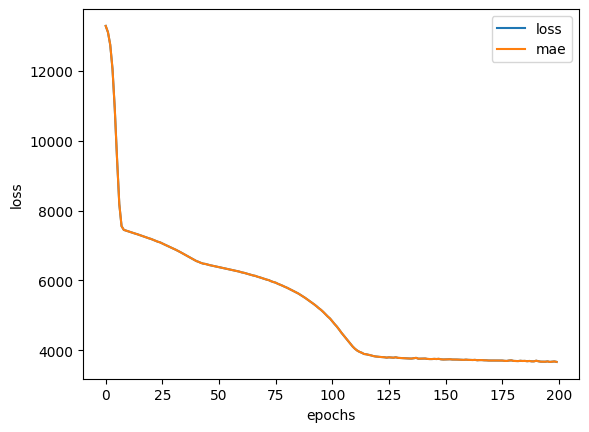

In [118]:
# Plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Preprocessing data (normalization and standardization



In [119]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.850,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<Axes: ylabel='Frequency'>

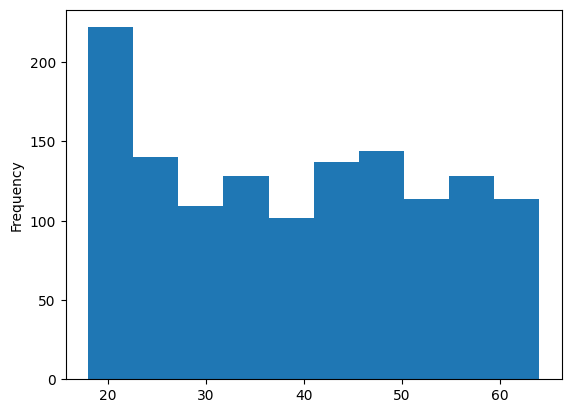

In [120]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

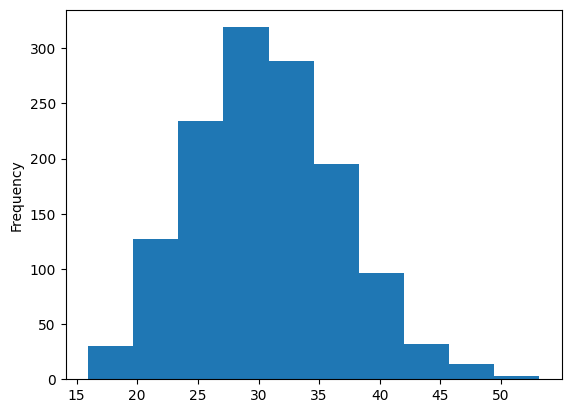

In [121]:
X["bmi"].plot(kind="hist")

<Axes: ylabel='Frequency'>

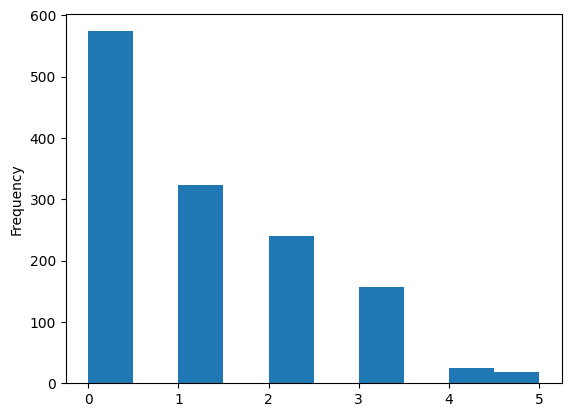

In [122]:
X["children"].plot(kind="hist")

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from SciKit learn.

In [124]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer.
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y values.
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sats
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMAxScalar, and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [125]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [126]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Beautiful! Our data has been normalized and on hot encoded. Now let's build a neural network model on it and see how it goes.

In [127]:
tf.random.set_seed(42)

# Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

insurance_model_4.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [128]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3168.7361 - mae: 3168.7361


[3168.736083984375, 3168.736083984375]